In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR, LinearSVR

from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./CarPricesData.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [3]:
df.shape

(1436, 10)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1434.0,55.986750,18.581796,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1434.0,1566.990934,187.178221,1300.0,1400.0,1600.0,1600.00,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1434.0,1072.487448,52.672475,1000.0,1040.0,1070.0,1085.00,1615.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [6]:
df.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [7]:
for i in df.columns:
    if df[i].dtype == 'float':
        df[i].fillna(df[i].mean(), inplace= True)

In [8]:
df.isnull().mean()*100

Price        0.000000
Age          0.000000
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.000000
Doors        0.000000
Weight       0.000000
dtype: float64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().mean()*100

Price        0.0
Age          0.0
KM           0.0
FuelType     0.0
HP           0.0
MetColor     0.0
Automatic    0.0
CC           0.0
Doors        0.0
Weight       0.0
dtype: float64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.Automatic.value_counts()

Automatic
0    1352
1      79
Name: count, dtype: int64

In [14]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [15]:
df.FuelType.value_counts()

FuelType
Petrol    1260
Diesel     154
CNG         17
Name: count, dtype: int64

In [16]:
df.HP.value_counts()

HP
110    833
86     248
97     164
72      73
90      36
69      34
107     21
192     10
116      8
98       2
71       1
73       1
Name: count, dtype: int64

In [17]:
df.Doors.value_counts()

Doors
5    672
3    619
4    138
2      2
Name: count, dtype: int64

In [18]:
df.MetColor.value_counts()

MetColor
1    965
0    466
Name: count, dtype: int64

In [19]:
df.Automatic.value_counts()

Automatic
0    1352
1      79
Name: count, dtype: int64

In [20]:
df.CC.value_counts()

CC
1600.000000    843
1300.000000    246
1400.000000    164
2000.000000    118
1900.000000     30
1800.000000     13
1598.000000      4
1587.000000      4
1995.000000      2
1398.000000      2
1332.000000      2
1566.990934      2
1975.000000      1
Name: count, dtype: int64

In [21]:
le = LabelEncoder()

In [22]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = le.fit_transform(df[i])

In [23]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,1,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,1,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,1,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,1,90,0,0,2000.0,3,1170.0


In [24]:
numerical = df[['Price','Age','KM','Weight','HP','CC']]
numerical.head()

,Price,Age,KM,Weight,HP,CC
0,13500,23.0,46986,1165.0,90,2000.0
1,13750,23.0,72937,1165.0,90,2000.0
2,13950,24.0,41711,1165.0,90,2000.0
3,14950,26.0,48000,1165.0,90,2000.0
4,13750,30.0,38500,1170.0,90,2000.0


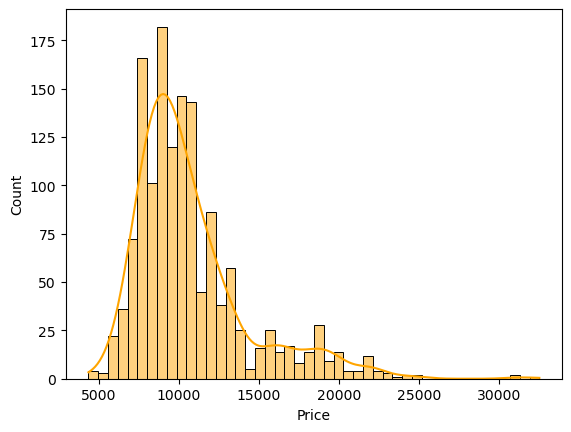

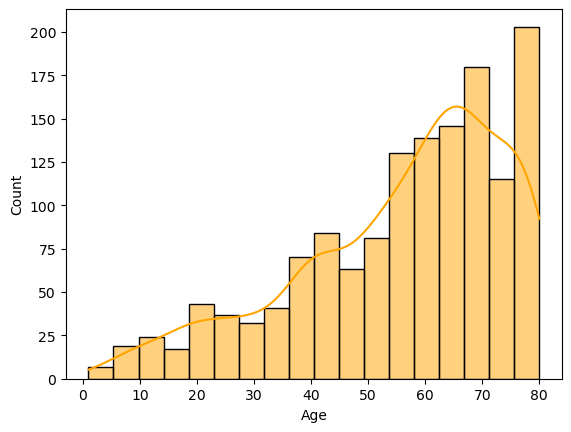

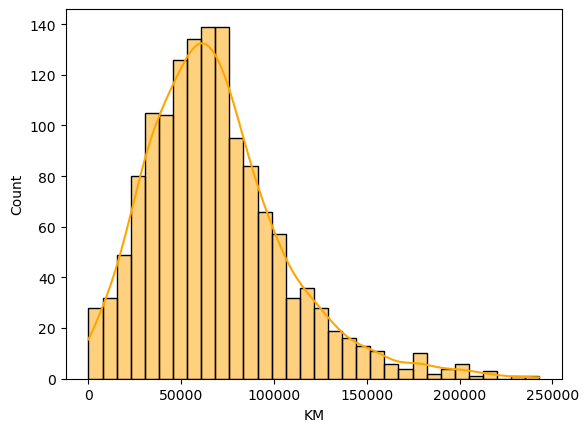

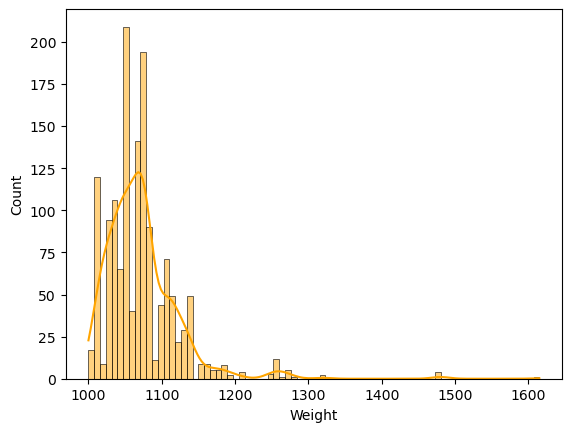

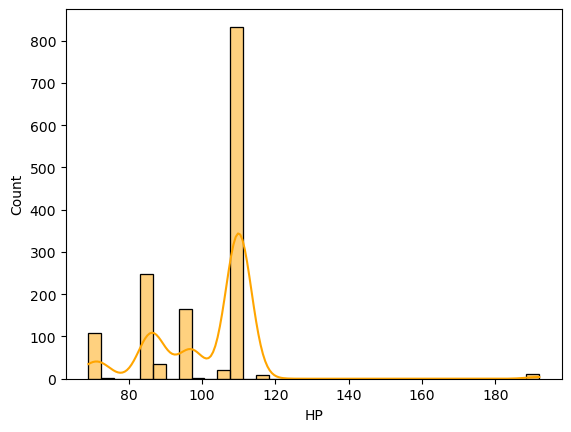

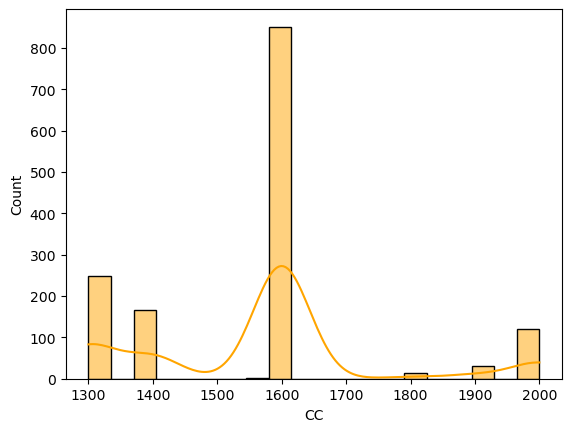

In [25]:
for i in numerical.columns:
    if numerical[i].dtype != 'object':
        sns.histplot(data = numerical, x = numerical[i], kde = True, color = 'orange')
        plt.show()

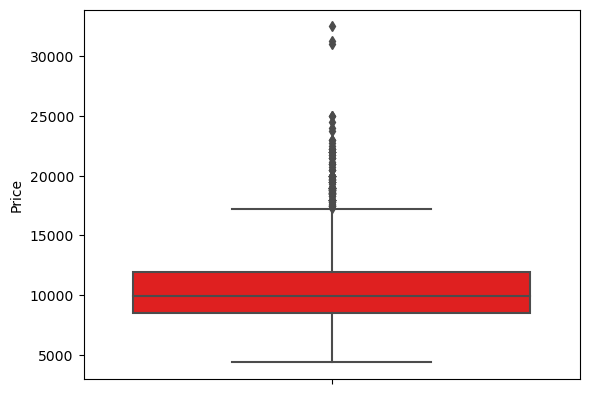

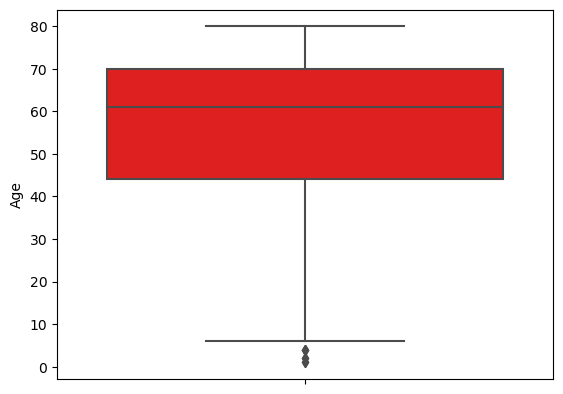

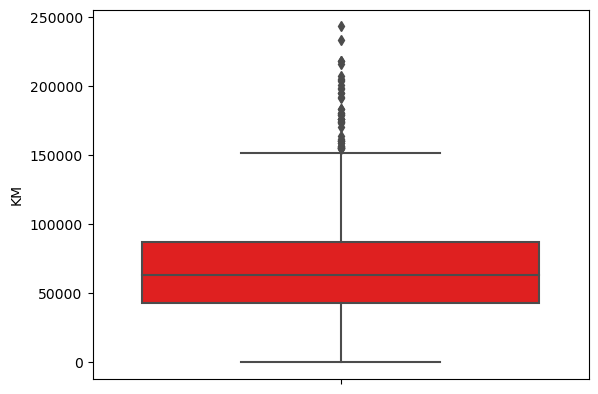

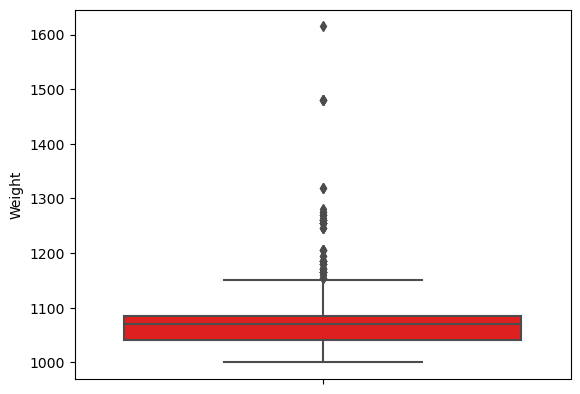

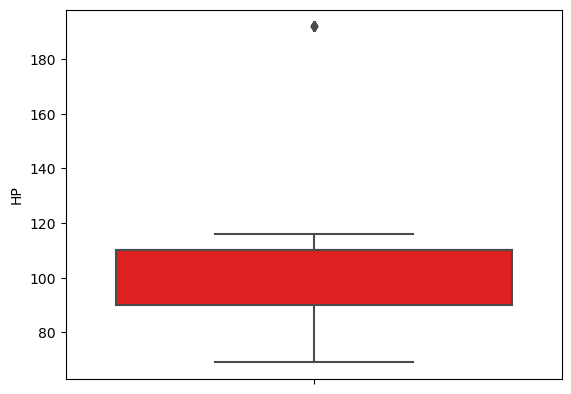

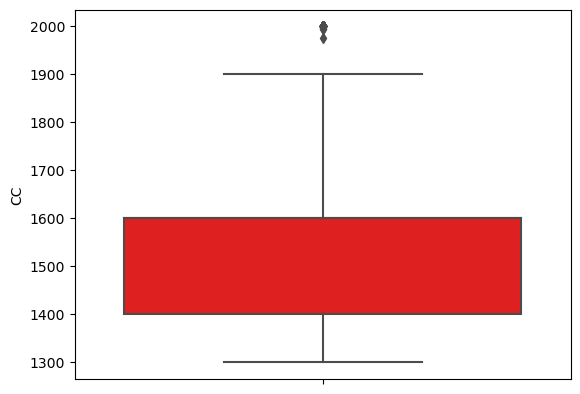

In [26]:
for i in numerical.columns:
    if numerical[i].dtype != 'object':
        sns.boxplot(data = numerical, y = numerical[i], color = 'red')
        plt.show()

In [27]:
#from scipy import stats
#df['Z-Score'] = stats.zscore(df.Price)

In [28]:
#df.shape

In [29]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,1,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,1,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,1,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,1,90,0,0,2000.0,3,1170.0


In [30]:
#cleaned_data = df[df['Z-Score'] < 3 ]
#cleaned_data.head()

In [31]:
#cleaned_data.shape

In [32]:
#sns.boxplot(data = cleaned_data , y= 'Price', color = 'green');

In [33]:
#cleaned_data.drop(columns = ['Z-Score'], inplace = True )

In [34]:
#cleaned_data.head()

### selecting the features

In [35]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,1,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,1,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,1,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,1,90,0,0,2000.0,3,1170.0


In [36]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

### Splitting the dataset into train and test datasets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state = 42)

### Checking model scores without feature selection`

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
model.score(x_train, y_train)

0.8612050367131673

In [42]:
model.score(x_test, y_test)

0.8691763409944665

#### Defining feature selection with all features included

In [43]:
fs = SelectKBest(score_func= f_regression, k = 'all')

In [44]:
fs.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001E045B4B6D0>)

#### We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

In [45]:
for i in range (len(fs.scores_)):
    print('Feature %d: %f' % (i,fs.scores_[i]))

Feature 0: 3659.978247
Feature 1: 555.439135
Feature 2: 0.198191
Feature 3: 142.262457
Feature 4: 13.635145
Feature 5: 3.823472
Feature 6: 28.351235
Feature 7: 38.976441
Feature 8: 582.836188


In [46]:
for i in range (len(fs.scores_)):
    print(f"Feature is: {i} and score is :{fs.scores_[i]}")

Feature is: 0 and score is :3659.9782473719024
Feature is: 1 and score is :555.4391348367768
Feature is: 2 and score is :0.19819092108350062
Feature is: 3 and score is :142.26245662781577
Feature is: 4 and score is :13.635144994549309
Feature is: 5 and score is :3.8234719334376632
Feature is: 6 and score is :28.351234682410023
Feature is: 7 and score is :38.97644097935106
Feature is: 8 and score is :582.836187692286


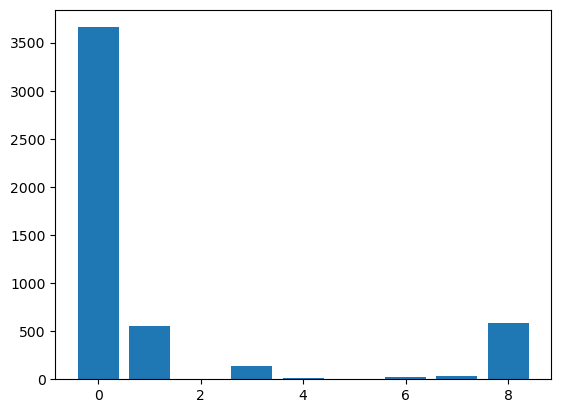

In [47]:
plt.bar([i  for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### The plot clearly shows 4 features are a lot more important than the other features. We could set k=4 When configuring the SelectKBest to select these top features.

In [48]:
fs = SelectKBest(score_func= f_regression, k = 4)

In [49]:
fs.fit(x_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001E045B4B6D0>)

In [50]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [51]:
x_train_fs.shape

(1144, 4)

In [52]:
x_test_fs.shape

(287, 4)

In [53]:
model =  LinearRegression()

In [54]:
model.fit(x_train_fs, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(x_test_fs)

In [56]:
r2_score(y_pred, y_test)

0.8453234338872241

In [57]:
model.score(x_train_fs, y_train)

0.8571205499276112

In [58]:
model.score(x_test_fs, y_test)

0.8654226353284538

### Selecting only the top feature

In [59]:
fs = SelectKBest(score_func= f_regression, k=1)

In [60]:
fs.fit(x_train, y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x000001E045B4B6D0>)

In [61]:
x_train_fs = fs.transform(x_train)

In [62]:
x_test_fs = fs.transform(x_test)

In [63]:
model = LinearRegression()

In [64]:
model.fit(x_train_fs, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(x_test_fs)

In [66]:
r2_score(y_pred, y_test)

0.7426999062805526

In [67]:
model.score(x_train_fs, y_train)

0.7621813466928954

In [68]:
model.score(x_test_fs, y_test)

0.7877379244190669